# Importaciones de librerias y datos necesarios

In [1]:
import os
import numpy as np
import pandas as pd
import zipfile
import kaggle
import seaborn as sns
import matplotlib.pyplot as plt
import unicodedata

## Importación opcional de los datos de la competencia en Kaggle

In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = './kaggle-config'
!kaggle competitions download -c udea-ai4eng-20241

udea-ai4eng-20241.zip: Skipping, found more recently modified local copy (use --force to force download)


## Extraer datos de los archivos de Kaggle

In [3]:
path = "udea-ai4eng-20241.zip"
directory = "data/"

with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall(directory)

# Visualizar dataframe con los datos de la competencia

In [4]:
df = pd.read_csv('data/train.csv')
df.head(5)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo


In [5]:
df.dtypes

ID                                 int64
PERIODO                            int64
ESTU_PRGM_ACADEMICO               object
ESTU_PRGM_DEPARTAMENTO            object
ESTU_VALORMATRICULAUNIVERSIDAD    object
ESTU_HORASSEMANATRABAJA           object
FAMI_ESTRATOVIVIENDA              object
FAMI_TIENEINTERNET                object
FAMI_EDUCACIONPADRE               object
FAMI_TIENELAVADORA                object
FAMI_TIENEAUTOMOVIL               object
ESTU_PRIVADO_LIBERTAD             object
ESTU_PAGOMATRICULAPROPIO          object
FAMI_TIENECOMPUTADOR              object
FAMI_TIENEINTERNET.1              object
FAMI_EDUCACIONMADRE               object
RENDIMIENTO_GLOBAL                object
dtype: object

## Se visualizan los datos faltantes

In [6]:
def show_missing_values(df):
    plt.figure(figsize=(10,6))
    sns.displot(
        data=df.isna().melt(value_name="Faltantes"),
        y="variable",
        hue="Faltantes",
        multiple="fill",
        aspect=1.25
    )

<Figure size 1000x600 with 0 Axes>

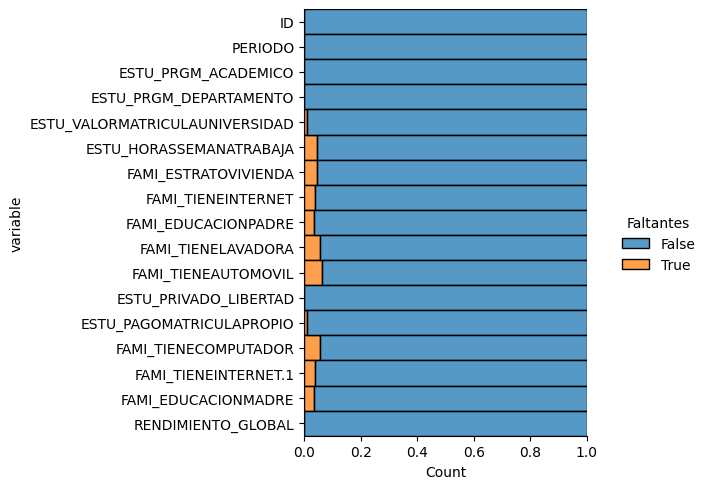

In [7]:
show_missing_values(df)

# Limpieza de los valores en la columna ESTU_PRGM_ACADEMICO 

In [ ]:
def normalize_string(s):
    return (
        unicodedata.normalize('NFKD', s)
        .encode('ascii', errors='ignore')
        .decode('utf-8')
        .lower()
        .strip()
        .replace('  ', ' ')
    )

df['ESTU_PRGM_ACADEMICO'] = df['ESTU_PRGM_ACADEMICO'].apply(normalize_string)

In [ ]:
df['ESTU_PRGM_ACADEMICO'].value_counts().to_dict()

# Limpieza de columnas duplicadas

## FAMI_TIENEINTERNET

Mediante ``` df.dtypes ``` verificamos que tenemos 2 columnas que inician con 'FAMI_TIENEINTERNET', vamos validar si tiene los mismos datos.

In [8]:
(df['FAMI_TIENEINTERNET'] == df['FAMI_TIENEINTERNET.1']).value_counts()

True     665871
False     26629
Name: count, dtype: int64

In [9]:
np.nan == np.nan

False

In [10]:
df['FAMI_TIENEINTERNET.1'].isna().sum()

26629

In [11]:
df['FAMI_TIENEINTERNET.1'].isna().sum() == df['FAMI_TIENEINTERNET'].isna().sum()

True

Tenemos **26629** que no coinciden en la comparacion entre 'FAMI_TIENEINTERNET' y 'FAMI_TIENEINTERNET.1'. Esto se debe a que al comparar los datos nulos de las columnas ocurre la condicion ```np.nan == np.nan``` y es igual a ```False```, ademas, la cantidad de datos nulos en ambas columnas es **26629**. Por tanto se puede eliminar la comuna 'FAMI_TIENEINTERNET.1'.

In [12]:
df.drop(['FAMI_TIENEINTERNET.1'], axis = 1, inplace = True) #columna repetida

# Limpieza de variables categoricas con valores nulos

A continuación realizaremos la limpieza de las variables ESTU_VALORMATRICULAUNIVERSIDAD, ESTU_HORASSEMANATRABAJA, FAMI_ESTRATOVIVIENDA, FAMI_TIENEINTERNET, FAMI_EDUCACIONPADRE, FAMI_TIENELAVADORA, FAMI_TIENEAUTOMOVIL, ESTU_PRIVADO_LIBERTAD, ESTU_PAGOMATRICULAPROPIO, FAMI_TIENECOMPUTADOR y FAMI_EDUCACIONMADRE.

In [13]:
categorical_columns = ['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET',
                            'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL',
                            'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'FAMI_EDUCACIONMADRE']

In [14]:
def show_unique_values_by_columns(df, array_columns):
    for col in array_columns:
        print(f'{col} =', df[col].unique(),'\n')

In [15]:
show_unique_values_by_columns(df, categorical_columns)

ESTU_VALORMATRICULAUNIVERSIDAD = ['Entre 5.5 millones y menos de 7 millones'
 'Entre 2.5 millones y menos de 4 millones'
 'Entre 4 millones y menos de 5.5 millones' 'Más de 7 millones'
 'Entre 1 millón y menos de 2.5 millones'
 'Entre 500 mil y menos de 1 millón' 'Menos de 500 mil'
 'No pagó matrícula' nan] 

ESTU_HORASSEMANATRABAJA = ['Menos de 10 horas' '0' 'Más de 30 horas' 'Entre 21 y 30 horas'
 'Entre 11 y 20 horas' nan] 

FAMI_ESTRATOVIVIENDA = ['Estrato 3' 'Estrato 4' 'Estrato 5' 'Estrato 2' 'Estrato 1' nan
 'Estrato 6' 'Sin Estrato'] 

FAMI_TIENEINTERNET = ['Si' 'No' nan] 

FAMI_EDUCACIONPADRE = ['Técnica o tecnológica incompleta' 'Técnica o tecnológica completa'
 'Secundaria (Bachillerato) completa' 'No sabe' 'Primaria completa'
 'Educación profesional completa' 'Educación profesional incompleta'
 'Primaria incompleta' 'Postgrado' nan
 'Secundaria (Bachillerato) incompleta' 'Ninguno' 'No Aplica'] 

FAMI_TIENELAVADORA = ['Si' 'No' nan] 

FAMI_TIENEAUTOMOVIL = ['Si' 'No' nan] 



In [16]:
def fillna_with_mode(df, array_columns):
  for col in array_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [17]:
def fillna_with_a_value(df, col, value):
    df[col] = df[col].fillna(value)

In [18]:
def replace_value_in_a_column(df, col, to_replace, new_value):
    df[col] = df[col].replace(to_replace, new_value)

In [19]:
categorical_columns1 = categorical_columns.copy()
categorical_columns1.remove('FAMI_EDUCACIONPADRE')
categorical_columns1.remove('FAMI_EDUCACIONMADRE')

In [20]:
fillna_with_mode(df, categorical_columns1)

In [21]:
categorical_columns2 = ['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE']

In [22]:
for col in categorical_columns2:
    fillna_with_a_value(df, col, 'No sabe')

In [23]:
for col in categorical_columns2:
    replace_value_in_a_column(df, col, 'No Aplica', 'Ninguno')

<Figure size 1000x600 with 0 Axes>

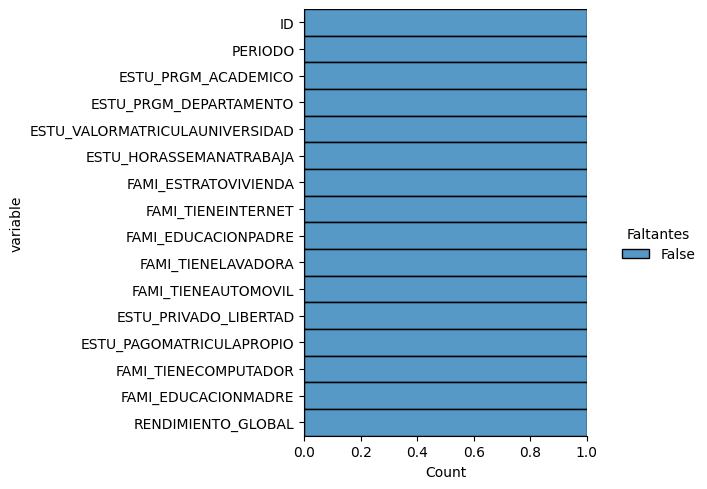

In [24]:
show_missing_values(df)

In [25]:
df['PERIODO'].unique()

array([20212, 20203, 20195, 20183, 20194, 20213, 20184, 20202, 20196],
      dtype=int64)

In [26]:
str_period = df['PERIODO'].astype(str)
df['PERIODO'] = str_period.str[:4] + '_' + str_period.str[4]

In [27]:
df.astype({'PERIODO': 'object'}).dtypes

ID                                 int64
PERIODO                           object
ESTU_PRGM_ACADEMICO               object
ESTU_PRGM_DEPARTAMENTO            object
ESTU_VALORMATRICULAUNIVERSIDAD    object
ESTU_HORASSEMANATRABAJA           object
FAMI_ESTRATOVIVIENDA              object
FAMI_TIENEINTERNET                object
FAMI_EDUCACIONPADRE               object
FAMI_TIENELAVADORA                object
FAMI_TIENEAUTOMOVIL               object
ESTU_PRIVADO_LIBERTAD             object
ESTU_PAGOMATRICULAPROPIO          object
FAMI_TIENECOMPUTADOR              object
FAMI_EDUCACIONMADRE               object
RENDIMIENTO_GLOBAL                object
dtype: object

In [28]:
df.drop(['ID'], axis = 1, inplace = True)

In [29]:
# Mapear los valores de las columnas según las asignaciones proporcionadas
mapeo_valormatricula = {
    'No pagó matrícula': 1,
    'Menos de 500 mil': 2,
    'Entre 500 mil y menos de 1 millón': 3,
    'Entre 1 millón y menos de 2.5 millones': 4,
    'Entre 2.5 millones y menos de 4 millones': 5,
    'Entre 4 millones y menos de 5.5 millones': 6,
    'Entre 5.5 millones y menos de 7 millones': 7,
    'Más de 7 millones': 8
}

mapeo_horassemanatrabaja = {
    '0': 0,
    'Menos de 10 horas': 1,
    'Entre 11 y 20 horas': 2,
    'Entre 21 y 30 horas': 3,
    'Más de 30 horas': 4
}
mapeo_estratovivienda = {
    'Sin Estrato': 0,
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6
}

map_rendimiento_global = {
    'bajo': 0,
    'medio-bajo': 1,
    'medio-alto': 2,
    'alto': 3
}

df['ESTU_VALORMATRICULAUNIVERSIDAD'] = df['ESTU_VALORMATRICULAUNIVERSIDAD'].map(mapeo_valormatricula).astype('uint8')
df['ESTU_HORASSEMANATRABAJA'] = df['ESTU_HORASSEMANATRABAJA'].map(mapeo_horassemanatrabaja).astype('uint8')
df['FAMI_ESTRATOVIVIENDA'] = df['FAMI_ESTRATOVIVIENDA'].map(mapeo_estratovivienda).astype('uint8')
df['RENDIMIENTO_GLOBAL'] = df['RENDIMIENTO_GLOBAL'].map(map_rendimiento_global).astype('uint8')

In [30]:
def set_integer_by_text(value, true_text):
  if value and value == true_text:
    return 1
  else: 
    return 0

In [31]:
df['FAMI_TIENELAVADORA'] = df['FAMI_TIENELAVADORA'].map(lambda x: set_integer_by_text(x, 'Si'))
df['FAMI_TIENEAUTOMOVIL'] = df['FAMI_TIENEAUTOMOVIL'].map(lambda x: set_integer_by_text(x, 'Si'))
df['ESTU_PRIVADO_LIBERTAD'] = df['ESTU_PRIVADO_LIBERTAD'].map(lambda x: set_integer_by_text(x, 'S'))
df['ESTU_PAGOMATRICULAPROPIO'] = df['ESTU_PAGOMATRICULAPROPIO'].map(lambda x: set_integer_by_text(x, 'Si'))
df['FAMI_TIENECOMPUTADOR'] = df['FAMI_TIENECOMPUTADOR'].map(lambda x: set_integer_by_text(x, 'Si'))
df['FAMI_TIENEINTERNET'] = df['FAMI_TIENEINTERNET'].map(lambda x: set_integer_by_text(x, 'Si'))

In [32]:
df

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,2021_2,ENFERMERIA,BOGOTÁ,7,1,3,1,Técnica o tecnológica incompleta,1,1,0,0,1,Postgrado,2
1,2021_2,DERECHO,ATLANTICO,5,0,3,0,Técnica o tecnológica completa,1,0,0,0,1,Técnica o tecnológica incompleta,0
2,2020_3,MERCADEO Y PUBLICIDAD,BOGOTÁ,5,4,3,1,Secundaria (Bachillerato) completa,1,0,0,0,0,Secundaria (Bachillerato) completa,0
3,2019_5,ADMINISTRACION DE EMPRESAS,SANTANDER,6,0,4,1,No sabe,1,0,0,0,1,Secundaria (Bachillerato) completa,3
4,2021_2,PSICOLOGIA,ANTIOQUIA,5,3,3,1,Primaria completa,1,1,0,0,1,Primaria completa,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,2019_5,BIOLOGIA,LA GUAJIRA,3,2,2,1,Secundaria (Bachillerato) completa,1,0,0,1,1,Secundaria (Bachillerato) incompleta,2
692496,2021_2,PSICOLOGIA,NORTE SANTANDER,5,4,3,1,Primaria incompleta,1,0,0,0,1,Secundaria (Bachillerato) incompleta,0
692497,2018_3,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,4,1,3,1,Secundaria (Bachillerato) completa,1,0,0,1,1,Secundaria (Bachillerato) incompleta,1
692498,2019_5,PSICOLOGIA,TOLIMA,5,1,1,0,Primaria completa,0,0,0,1,1,Primaria completa,0


In [34]:
categorical_columns = ['PERIODO','ESTU_PRGM_ACADEMICO','ESTU_PRGM_DEPARTAMENTO','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE']
#,'ESTU_PRGM_ACADEMICO'
df = pd.get_dummies(df, columns=categorical_columns, dummy_na=False, dtype='uint8')

In [35]:
df

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,RENDIMIENTO_GLOBAL,...,FAMI_EDUCACIONMADRE_Educación profesional incompleta,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta
0,7,1,3,1,1,1,0,0,1,2,...,0,0,0,1,0,0,0,0,0,0
1,5,0,3,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,5,4,3,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,6,0,4,1,1,0,0,0,1,3,...,0,0,0,0,0,0,1,0,0,0
4,5,3,3,1,1,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,3,2,2,1,1,0,0,1,1,2,...,0,0,0,0,0,0,0,1,0,0
692496,5,4,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
692497,4,1,3,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
692498,5,1,1,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
